In [1]:
from utils import load_and_prepare_building_dfs, get_voll_temps, normalize_building_dfs
import matplotlib.pyplot as plt

In [2]:
df = load_and_prepare_building_dfs(esave_path="data/EsaveExport_Trondheim Kommune_Trondheim_10121314.xls", vis_path="data/VIS Målere.xlsx")
temps = get_voll_temps(voll_path="data/Volltemp.xlsx").resample("D").mean().values

Data loaded in 141.13 seconds


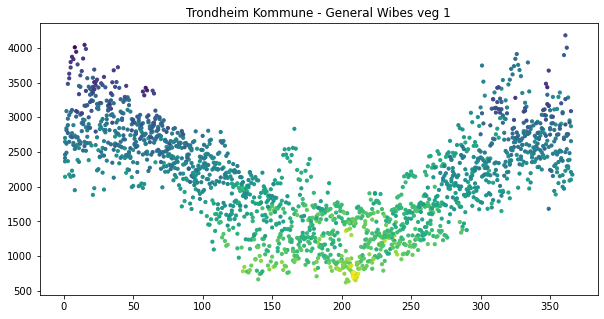

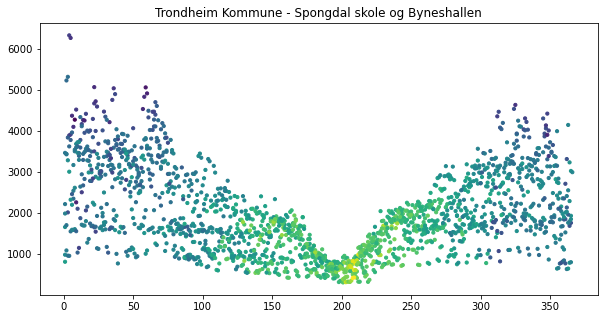

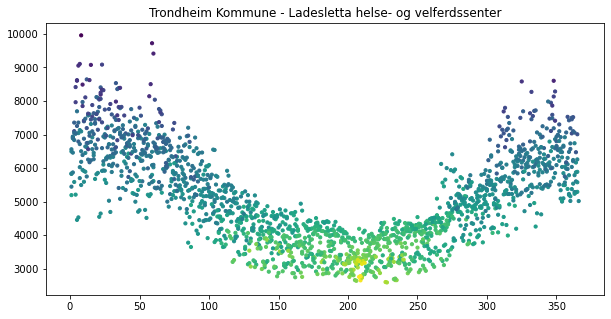

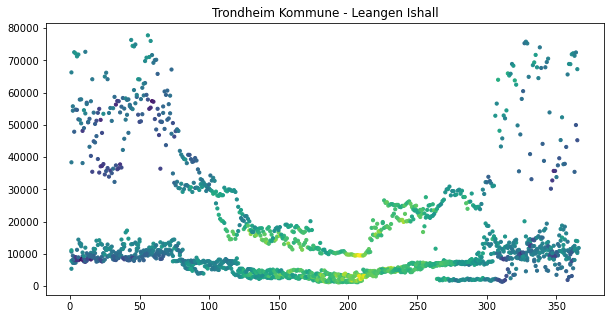

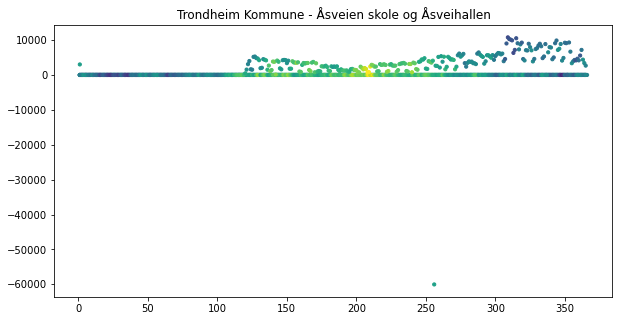

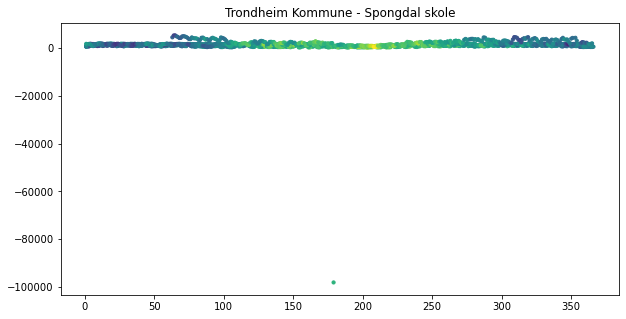

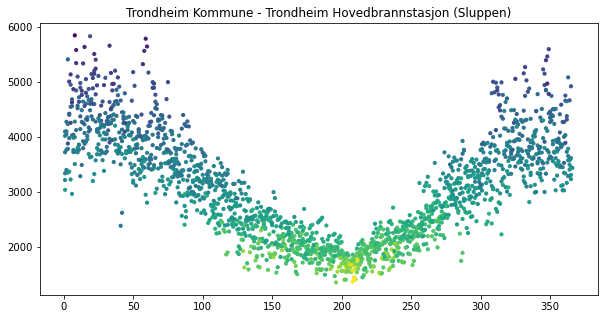

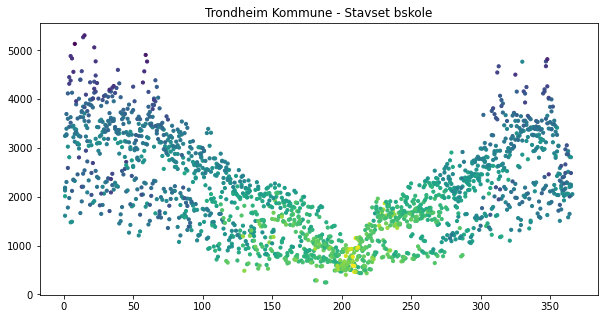

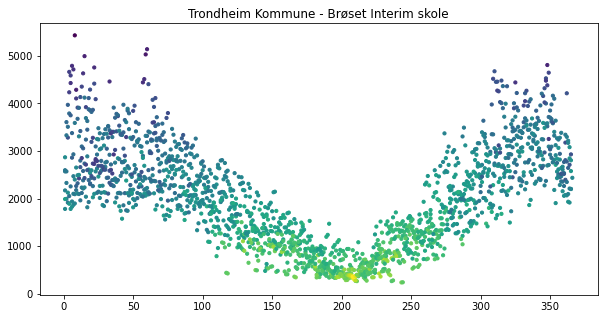

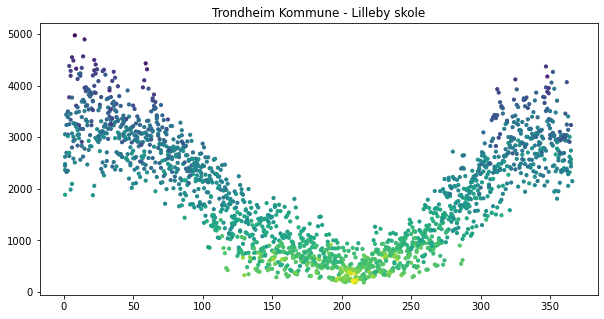

In [3]:
plt.rcParams['figure.figsize'] = (10, 5)

# plot time and and energy usage of the first 10 buildings
# x axis is day of the year
# energy usage is the y axis
# the color of the points is the temperature that time
i = 0
for building, values in df.items():
    i += 1
    if i > 10:
        break
    # sum energy usage of the building
    values = values.resample("D").sum()
    # get the temperature that day
    y = values["Totalt"]
    x = values.index.dayofyear
    plt.scatter(x, y, c=temps, s=10)
    plt.title(building)
    plt.show()

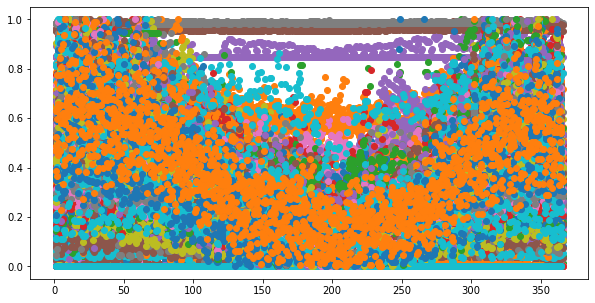

In [4]:
# sample every building daily
for building, values in df.items():
    df[building] = values.resample("D").sum()

# normalize all buildings from 0 to 1
building_dfs = normalize_building_dfs(df)

# plot first all buildings on same graph
i = 0

for building, values in building_dfs.items():
    i += 1
    # sum energy usage of the building
    # get the temperature that day
    y = values["Totalt"]
    x = values.index.dayofyear
    plt.scatter(x, y)
    
plt.show()

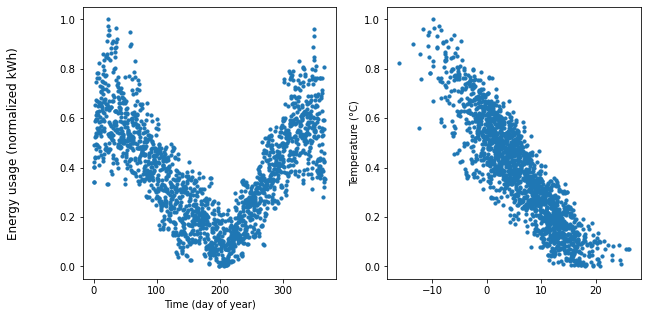

Trondheim Kommune - Kalvskinnet bskole


In [5]:
# engery usage vs time for one building
building = list(building_dfs.keys())[10]
values = building_dfs[building]
ytime = values["Totalt"]
xtime = values.index.dayofyear

# energy usage vs temperature for one building
ytemp = values["Totalt"]
xtemp = [t[0] for t in temps]

# scatter plot both graphs as two subplots
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.scatter(xtime, ytime, s=10)
ax2.scatter(xtemp, ytemp, s=10)
# set x and y labels for fig
ax1.set_xlabel("Time (day of year)")
ax2.set_ylabel("Temperature (°C)")
fig.supylabel("Energy usage (normalized kWh)")

plt.show()
print(building)

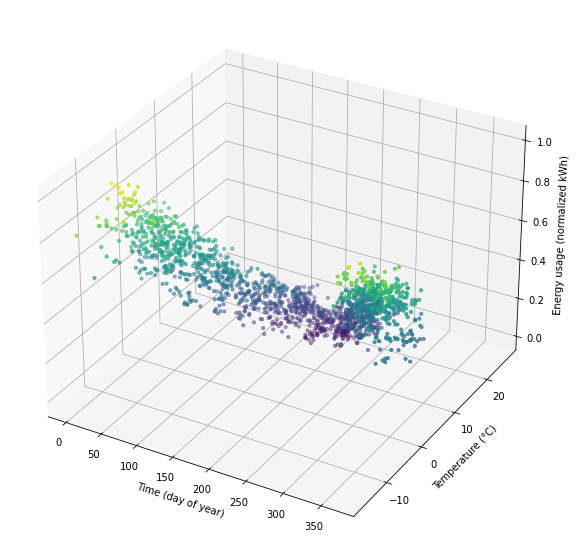

In [6]:
energy = building_dfs[building]["Totalt"]
time = building_dfs[building].index.dayofyear
temp = [t[0] for t in temps]

plt.figure(figsize=(10, 10))
ax = plt.axes(projection="3d")
ax.scatter3D(time, temp, energy, s=10, c=energy)
ax.set_xlabel("Time (day of year)")
ax.set_ylabel("Temperature (°C)")
ax.set_zlabel("Energy usage (normalized kWh)")

plt.show()

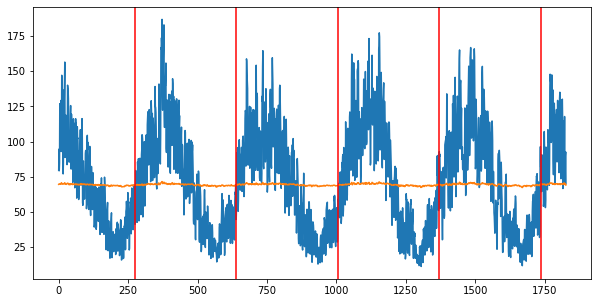

1825
(5, 365)


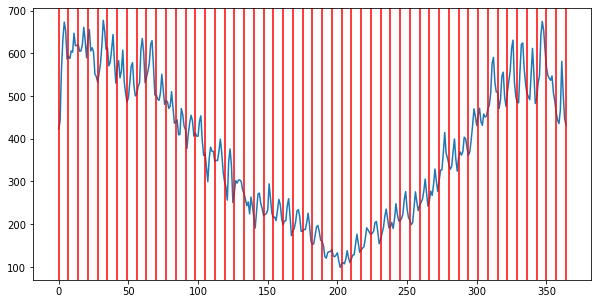

In [7]:
# take sum of energy usage of all buildings for each day
import numpy as np

days = range(0, 1827)
energy = np.zeros(1827)

for building, values in building_dfs.items():
    # if nan continue
    if np.isnan(values["Totalt"]).any():
        continue

    energy += values["Totalt"].values

# plot energy usage of all buildings
plt.plot(days, energy)
# plot temperature
plt.plot(days, -temps/10 + 70)
for i in range(0,5):
    plt.axvline(x=i*365 + 275, color="red")
plt.show()

energy = energy[:-2]
print(len(energy))
energy = energy.reshape(5, -1)
print(energy.shape)
energy = energy.sum(axis=0)

# scatter plot of energy usage
plt.plot(range(365), energy)
# create vline every 7 days
for i in range(0, 365, 7):
    plt.axvline(x=i, color="red")
plt.show()